In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

Duplicate key in file PosixPath('/Users/xuzhenhao/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 252 ('font.family:  sans-serif')
Duplicate key in file PosixPath('/Users/xuzhenhao/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 260 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/Users/xuzhenhao/miniconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 403 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


In [49]:
# 读取图片
img1 = Image.open(os.path.join('..', 'picture', '10.10.13.20_01_20210816094734539' + '.jpg'))  # 测试图片
img2 = Image.open(os.path.join('..', 'picture', '10.10.13.20_01_20210816094921810' + '.jpg'))  # 正常图片

# 转化灰度图
img1_gray = img1.convert('L')
img2_gray = img2.convert('L')

# 转化矩阵
img1_np = np.array(img1_gray)
img2_np = np.array(img2_gray)

# 测试图片与正常图相减，相当于两个图像矩阵相减, 要求两个矩阵必须有相同大小和通道数
subtracted = cv2.subtract(img1_np, img2_np)
imgsubtracted = Image.fromarray(subtracted)  # 差分图

# 找到差分矩阵中超过阈值的区域，
LightArr = np.where(subtracted>150)  # 设置检测阈值
LightIdx = [min(LightArr[1]), min(LightArr[0]), max(LightArr[1]), max(LightArr[0])]

img1Rawnp = np.array(img1)
if LightIdx[0]>200 and LightIdx[1]>200 and LightIdx[2]<1100 and LightIdx[3]<600:
    # 在ROI区域内，去除了监控时间等变化
    img1Rawnp = cv2.rectangle(img1Rawnp, (LightIdx[0]-5, LightIdx[1]-5), (LightIdx[2]+5, LightIdx[3]+5), (255, 0, 0), 2)
img1Patch = Image.fromarray(img1Rawnp)  # 检测图


<Figure size 432x288 with 0 Axes>

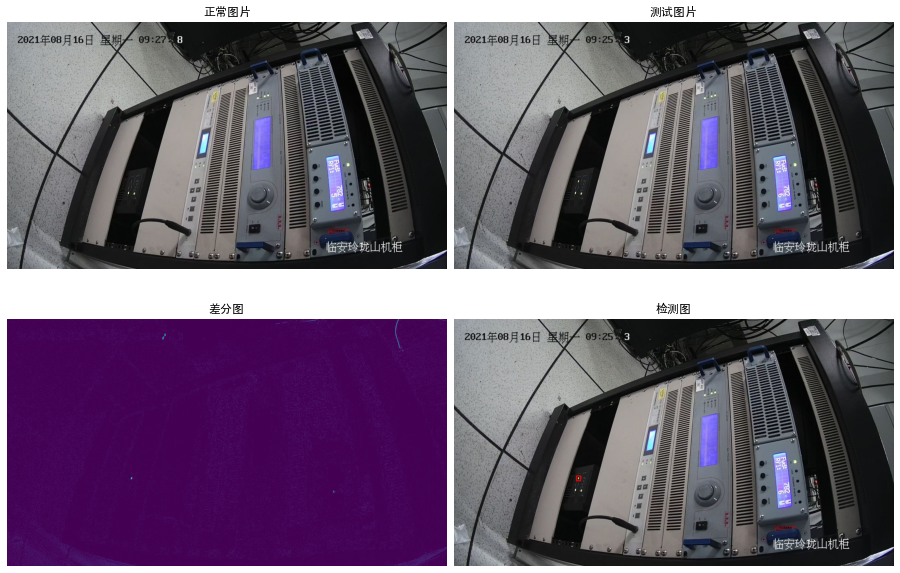

In [51]:
## 显示代码
plt.figure()
plt.figure(figsize=(16,10)) #设置窗口大小

plt.subplot(2,2,1)     #将窗口分为两行两列四个子图，则可显示四幅图片
plt.title('正常图片')   #第一幅图片标题
plt.axis('off')  #关闭坐标轴
plt.imshow(img2)  

plt.subplot(2,2,2)     
plt.title('测试图片')  
plt.axis('off')
plt.imshow(img1)  

plt.subplot(2,2,3)     
plt.title('差分图')
plt.axis('off')
plt.imshow(imgsubtracted)  

plt.subplot(2,2,4)     
plt.title('检测图')   
plt.axis('off')
plt.imshow(img1Patch)

plt.subplots_adjust(wspace =0)#调整子图间距
plt.show()   #显示

In [52]:
# 读取图片
img1 = Image.open(os.path.join('..', 'picture', '10.10.13.20_01_2021081616192489' + '.jpg'))  # 测试图片
img2 = Image.open(os.path.join('..', 'picture', '10.10.13.20_01_20210816094921810' + '.jpg'))  # 正常图片

# 转化灰度图
img1_gray = img1.convert('L')
img2_gray = img2.convert('L')

img1_np = np.array(img1_gray)
img2_np = np.array(img2_gray)
subtracted = cv2.subtract(img1_np, img2_np)
imgsubtracted = Image.fromarray(subtracted)  # 差分图

LightArr = np.where(subtracted>150)  # 设置检测阈值
LightIdx = [min(LightArr[1]), min(LightArr[0]), max(LightArr[1]), max(LightArr[0])]

img1Rawnp = np.array(img1)
if LightIdx[0]>200 and LightIdx[1]>200 and LightIdx[2]<1100 and LightIdx[3]<600:
    # 在ROI区域内，去除了监控时间等变化
    img1Rawnp = cv2.rectangle(img1Rawnp, (LightIdx[0]-5, LightIdx[1]-5), (LightIdx[2]+5, LightIdx[3]+5), (255, 0, 0), 2)
img1Patch = Image.fromarray(img1Rawnp)  # 检测图

<Figure size 432x288 with 0 Axes>

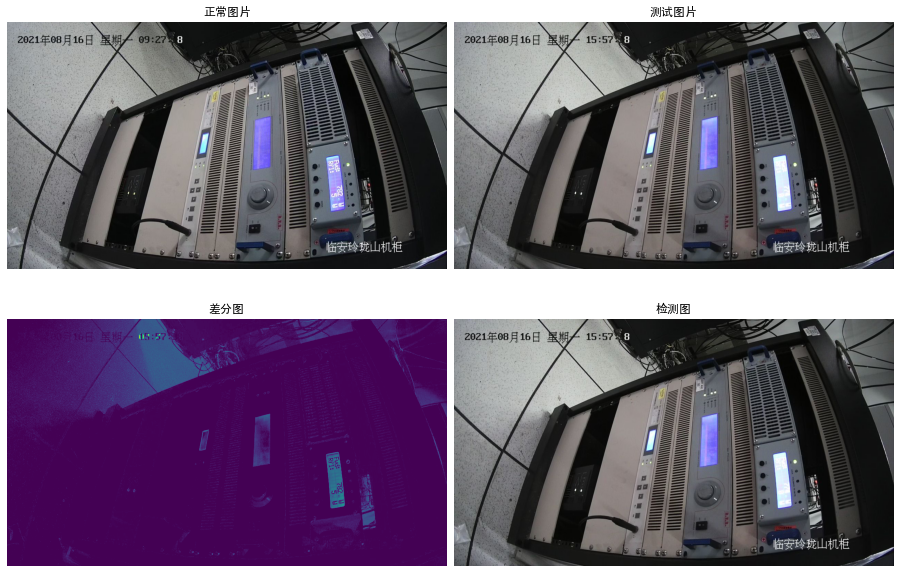

In [53]:
## 显示代码
plt.figure()
plt.figure(figsize=(16,10)) #设置窗口大小

plt.subplot(2,2,1)     #将窗口分为两行两列四个子图，则可显示四幅图片
plt.title('正常图片')   #第一幅图片标题
plt.axis('off')  #关闭坐标轴
plt.imshow(img2)  

plt.subplot(2,2,2)     
plt.title('测试图片')  
plt.axis('off')
plt.imshow(img1)  

plt.subplot(2,2,3)     
plt.title('差分图')
plt.axis('off')
plt.imshow(imgsubtracted)  

plt.subplot(2,2,4)     
plt.title('检测图')   
plt.axis('off')
plt.imshow(img1Patch)

plt.subplots_adjust(wspace =0)#调整子图间距
plt.show()   #显示